In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt

import pandas as pd

In [14]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/'
                         'treselle-systems/customer_churn_analysis/'
                         'master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

churn_data = churn_data.set_index('customerID')
churn_data = churn_data.drop(['TotalCharges'], axis=1)

# The dataset is naturally heirarchical: some columns only apply to some users. Ex, if you don't have internet 
# then the column OnlineBackup isn't applicable, as it's value is "No internet service". We 
# are going to map this back to No. We will treat the hierachical nature by stratifying on the 
# different services a user may have. 
churn_data = churn_data.applymap(lambda x: "No" if str(x).startswith("No ") else x)

strata_cols = ['InternetService', 'StreamingMovies', 'StreamingTV', 'PhoneService']

df = pd.get_dummies(churn_data, 
                    columns=churn_data.columns.difference(strata_cols + ['tenure', 'MonthlyCharges']), 
                    drop_first=True)



In [15]:
from lifelines import CoxPHFitter

cph = CoxPHFitter().fit(df, 'tenure', 'Churn_Yes', strata=strata_cols)

In [16]:
cph

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>

In [17]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'tenure'
         event col = 'Churn_Yes'
            strata = ['InternetService', 'StreamingMovies', 'StreamingTV', 'PhoneService']
number of subjects = 7043
  number of events = 1869
    log-likelihood = -10106.05
  time fit was run = 2019-03-05 19:53:05 UTC

---
                                       coef  exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
MonthlyCharges                        -0.01       0.99      0.02  -0.24   0.81      0.31       -0.05        0.04
Contract_One year                     -1.59       0.20      0.09 -17.82 <0.005    233.65       -1.77       -1.42
Contract_Two year                     -3.11       0.04      0.17 -18.00 <0.005    238.16       -3.45       -2.77
Dependents_Yes                        -0.05       0.95      0.07  -0.67   0.50      0.99       -0.18        0.09
DeviceProtection_Yes                  -0.32       0.73      0.13  -2.51   0.01

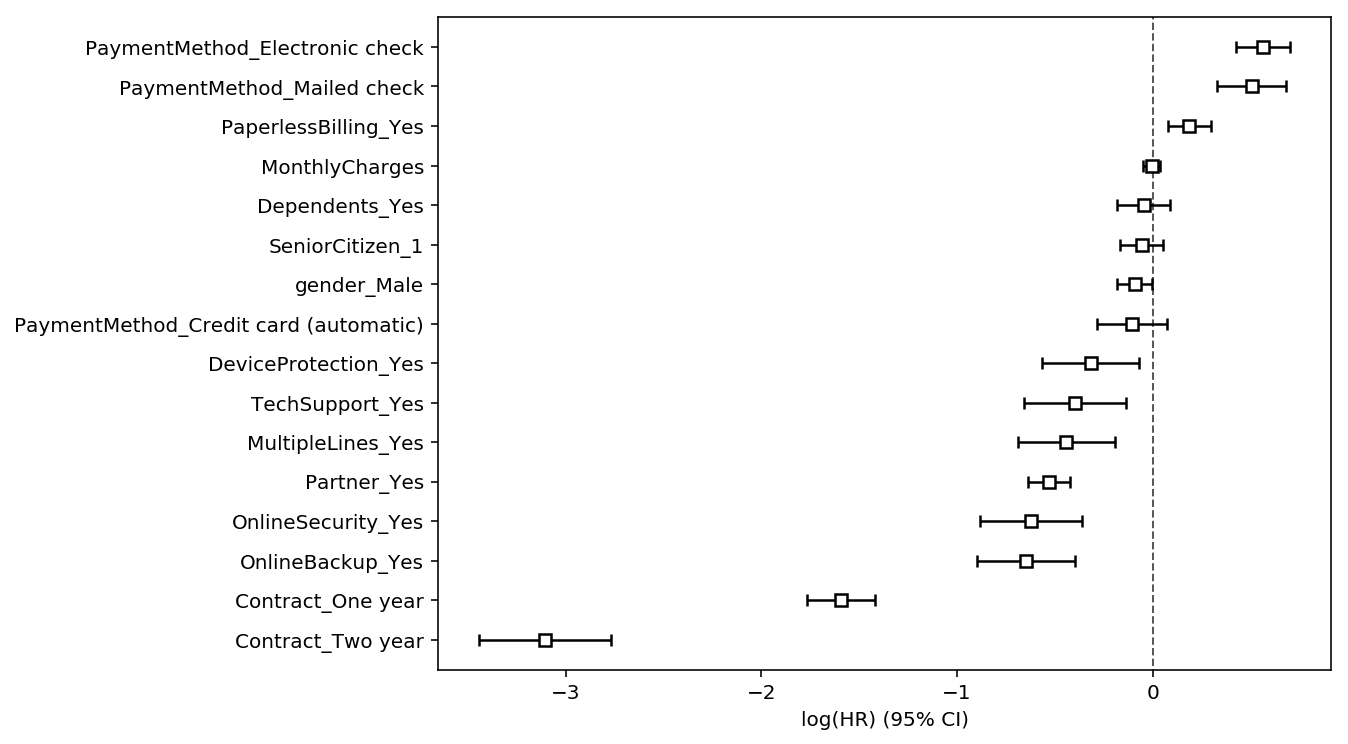

In [26]:
ax = plt.subplots(figsize=(8, 6))
cph.plot(ax=ax[1])

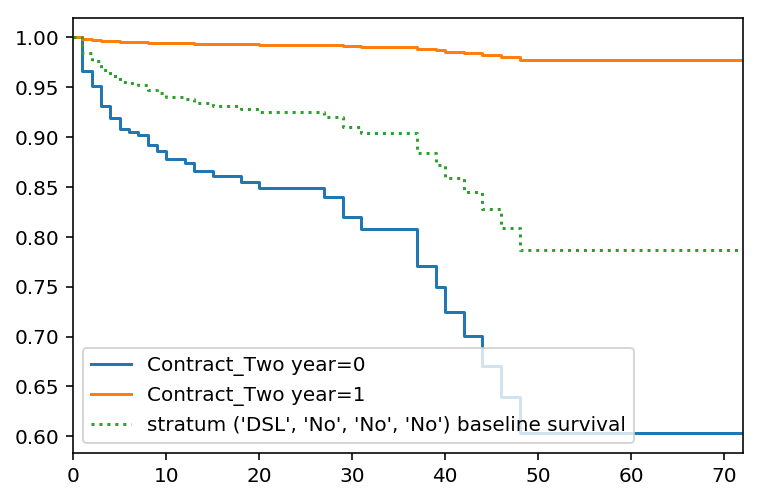

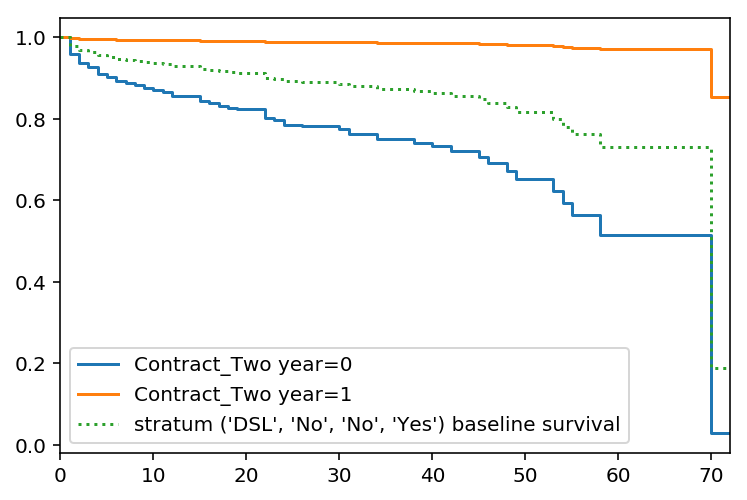

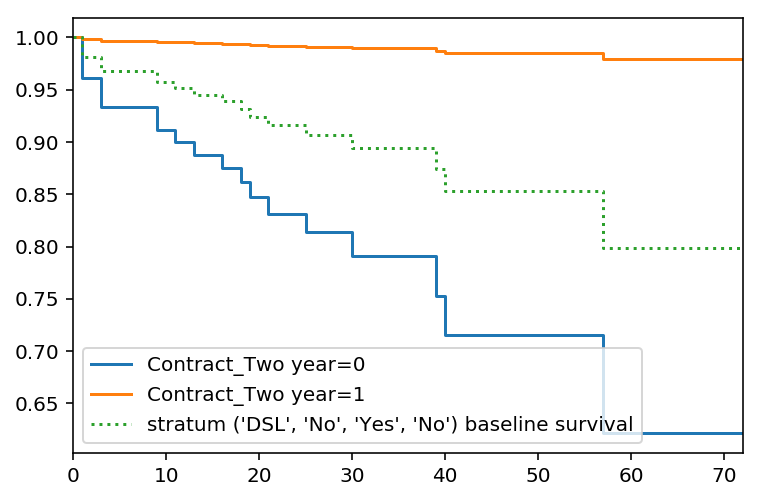

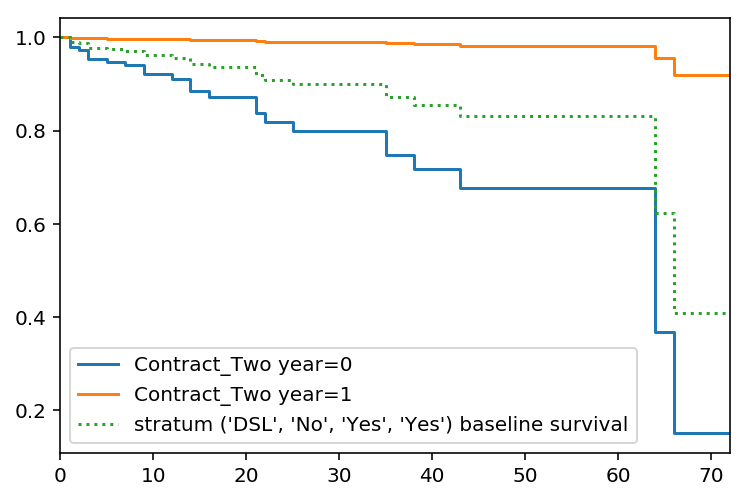

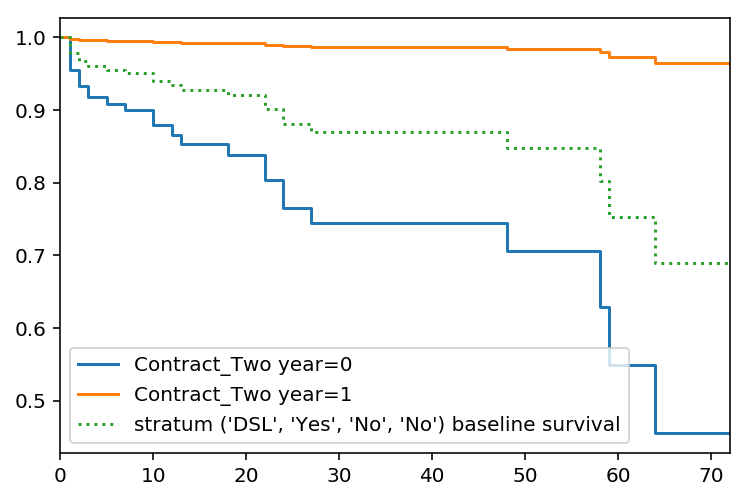

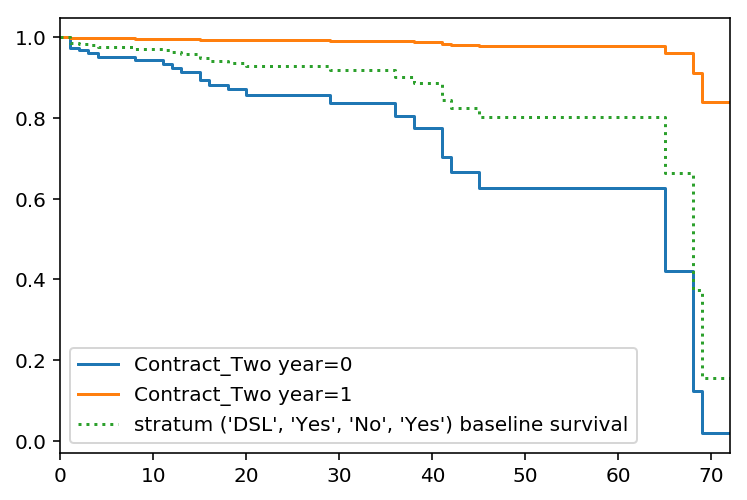

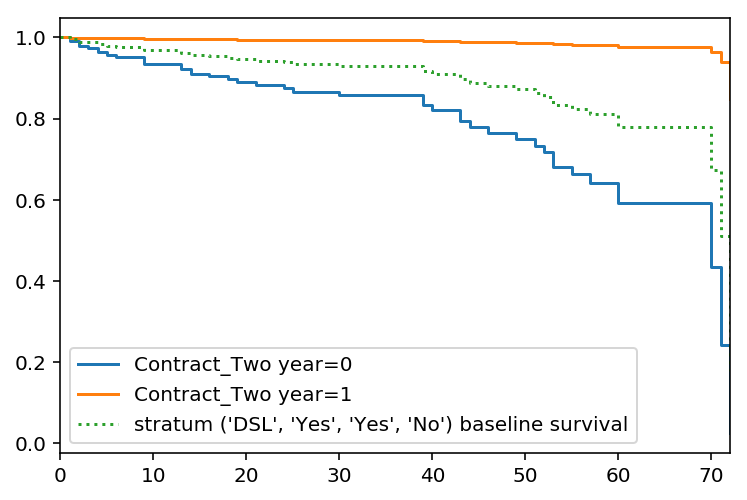

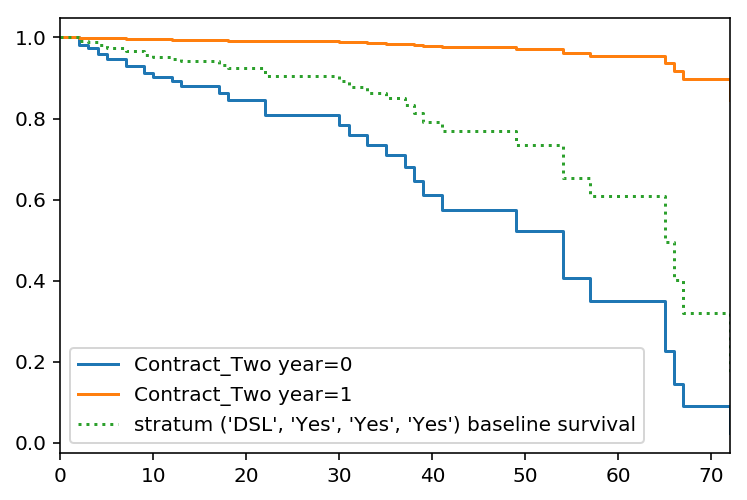

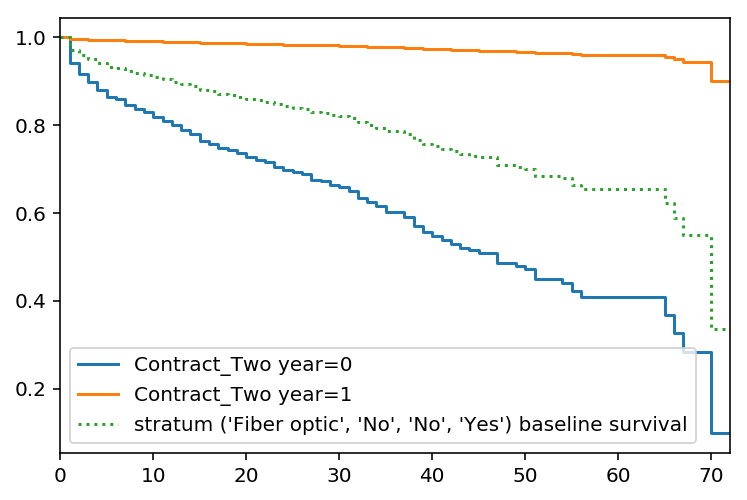

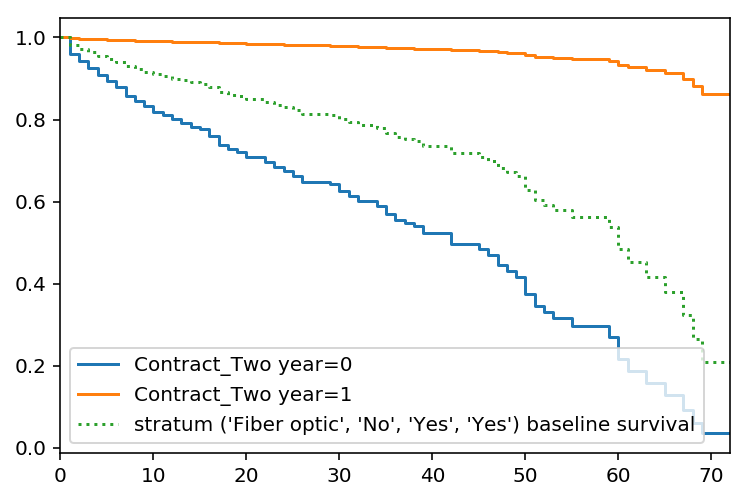

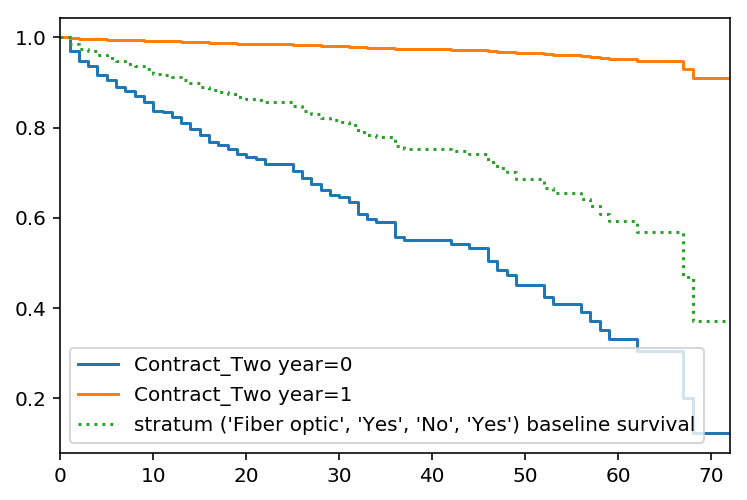

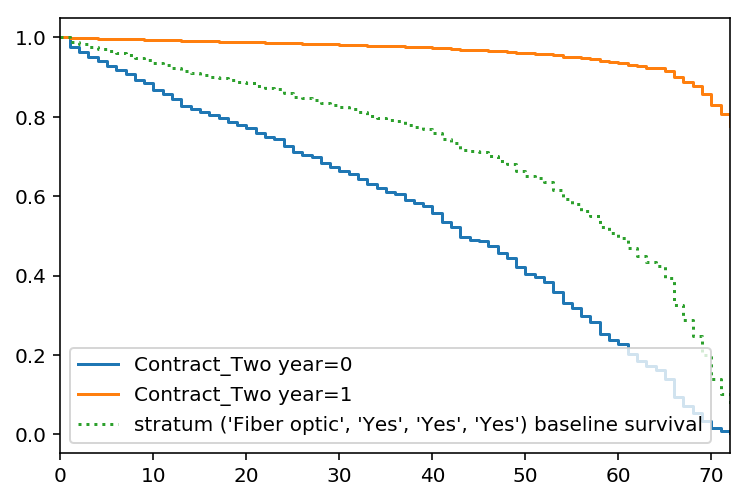

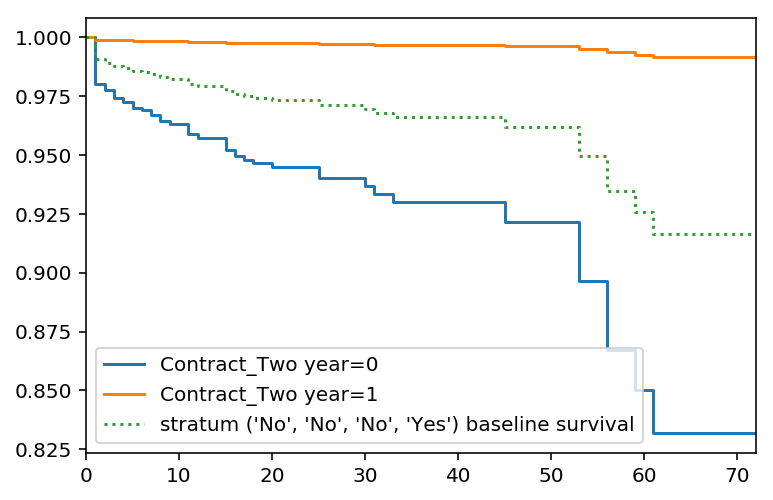

In [28]:
cph.plot_covariate_groups('Contract_Two year', values=[0, 1]);